<h1>Grenzwerte</h1>

... bitte *immer* mit Vorsicht genießen und wann immer möglich noch durch Denken oder alternative Rechnungen überprüfen!

In [273]:
var('n')

n

In [274]:
limit( (1 + 1/n)^n, n=oo)

e

In [275]:
a=limit(1/x, x=0) # "komplexes oo", vgl. https://en.wikipedia.org/wiki/Riemann_sphere
a

Infinity

In [276]:
parent(a)

Symbolic Ring

In [277]:
sgn(a)

sgn(Infinity)

Richtung kann über `dir`-Argument angegeben werden.

In [278]:
b=limit(1/x, x=0, dir='+')  # rechtsseitiger Grenzwert, (reelles) +oo

In [279]:
b

+Infinity

In [280]:
parent(b)

Symbolic Ring

In [282]:
sgn(b)

1

In [283]:
limit(1/x, x=0, dir='-')  # linksseitiger Grenzwert, (reelles) -oo

-Infinity

In [284]:
sgn(_)

-1

Grenzwerte in Ausdrücken bei denen Teile (mit Hilfe) wegen Identitäten vereinfacht werden können sind oft problematisch. Ein Beispiel:

In [302]:
var('a')

expr = x / (sqrt(1 + x)*sin(a)^2 + sqrt(1 - x)*cos(a)^2 - 1)
expr

x/(sqrt(-x + 1)*cos(a)^2 + sqrt(x + 1)*sin(a)^2 - 1)

Beachte: für $x = 0$ entsteht im Zähler 0, im Nenner $\cos(a)^2 + \sin(a)^2 - 1$ (was dank trigonometrischer Identität gleich 0 ist, Sage aber ohne Hilfe nicht "sieht"). Sage gibt daher als Grenzwert den Ausdruck $\frac{0}{\cos(a)^2 + \sin(a)^2 - 1} = 0$ zurück, was falsch ist.

In [303]:
expr.limit(x=0)

0

... mit ein bisschen Hilfe (hier konkret in Form der `trig_reduce`-Methode zur Vereinfachung/Umschreibung von trigonometrischen Ausdrücken) geht es aber doch:

In [304]:
expr.trig_reduce()

-2*x/(sqrt(x + 1)*cos(2*a) - sqrt(-x + 1)*cos(2*a) - sqrt(x + 1) - sqrt(-x + 1) + 2)

In [305]:
expr.trig_reduce().limit(x=0)

-2/cos(2*a)

Etwas einfacherer Ausdruck funktioniert problemlos

In [306]:
var('a')

expr = x / ((1 + x)*sin(a)^2 + (1 - x)*cos(a)^2 - 1)
expr

-x/((x - 1)*cos(a)^2 - (x + 1)*sin(a)^2 + 1)

In [307]:
expr.limit(x=0)

-sec(2*a)

<h1>Ebene Geometrie</h1>

In [308]:
A=[1,1]
B=[5,3]
C=[-1,5]

Zeichne Dreieck, Schwerlinien, Schwerpunkt

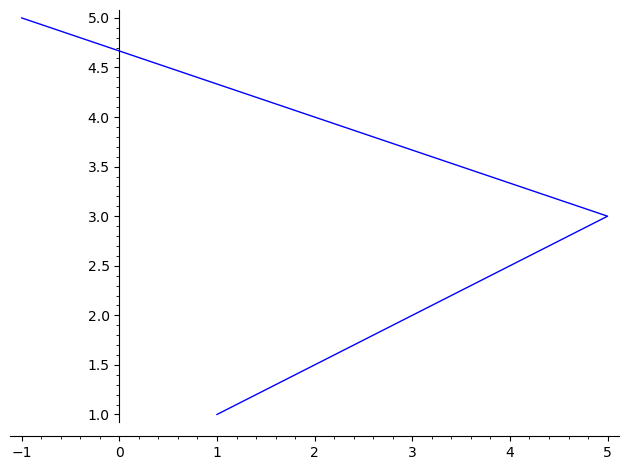

In [309]:
g=line([A,B,C])
g

Linie zurück zu A fehlt noch

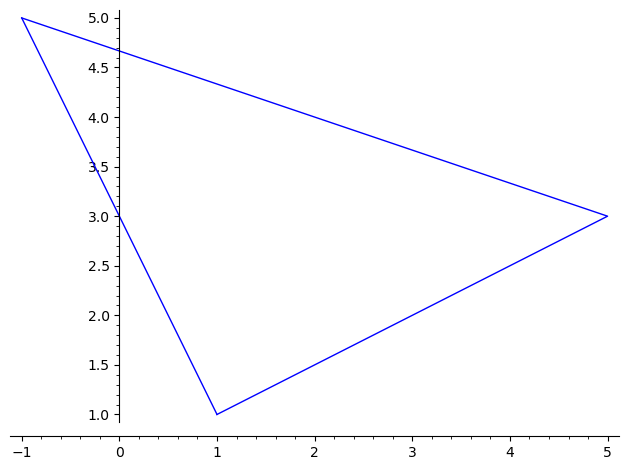

In [310]:
g+=line([A,C])
g

alternativ:

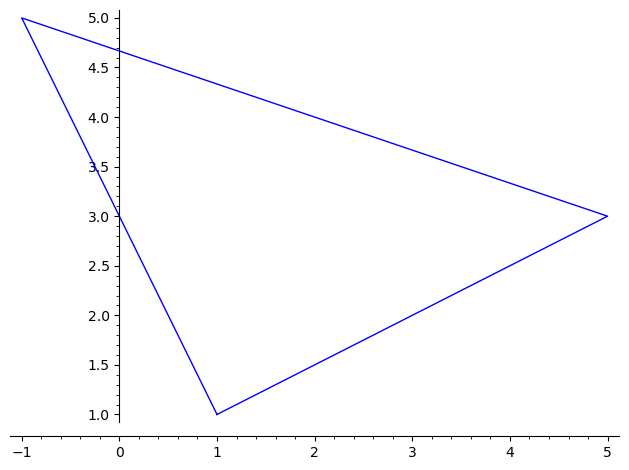

In [311]:
g=line([A,B,C,A])
g

In [312]:
(A+B)/2   # Seitenmittelpunkt

TypeError: unsupported operand parent(s) for /: '<class 'list'>' and 'Integer Ring'

Der letzte Befehl hat nicht funktioniert, weil A und B Listen und keine Vektoren sind. Z.B. liefert Addition von Listen nicht das, was wir wollen:

In [313]:
A+B

[1, 1, 5, 3]

In [314]:
A=vector(A)
B=vector(B)
C=vector(C)
A,B,C

((1, 1), (5, 3), (-1, 5))

In [315]:
parent(A)

Ambient free module of rank 2 over the principal ideal domain Integer Ring

"free Module": so etwas wie ein Vektorraum, nur über einem Ring, in dem man nicht unbedingt durch alle Elemente ungleich 0 dividieren kann (hier: ZZ). 

In [316]:
(A+B)/2  # Mittelpunkt

(3, 2)

In [317]:
parent(_)

Vector space of dimension 2 over Rational Field

Durch die Division wurde automatisch von ZZ^2 in den Vektorraum QQ^2 gewechselt.

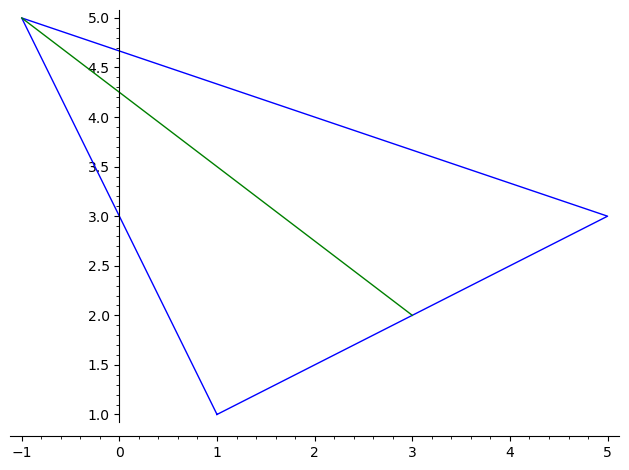

In [318]:
g+=line([(A+B)/2,C],color='green')
g

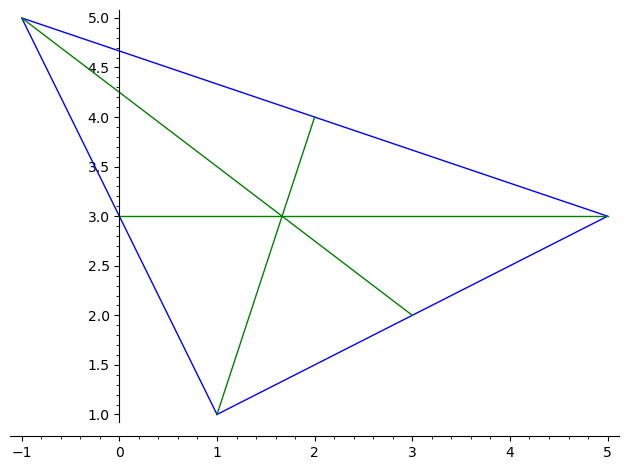

In [319]:
g+=line([(B+C)/2,A],color='green')
g+=line([(A+C)/2,B],color='green')
g

Nun wollen wir noch den Schwerpunkt einzeichnen. Dazu müssen wir seine Koordinaten berechnen. Wir tun das, indem wir für den Durchschnitt zweier Schwerlinien ein Gleichungssystem aufstellen und lösen.

In [320]:
var('s,t')

(s, t)

In [321]:
sA = A + s*((B+C)/2-A)    # Schwerlinie von Ecke A zum Mittelpunkt der Seite BC
sA

(s + 1, 3*s + 1)

In [322]:
sB = B +t*((A+C)/2-B)
sB

(-5*t + 5, 3)

In [323]:
solve(sA==sB,[s,t])

[]

Hat nicht funktioniert, da sA==sB kein symbolischer Ausdruck ist: es wird hier automatisch zu False ausgewertet, da die beiden Geraden ungleich sind.

In [324]:
sA==sB

False

In [325]:
sA-sB

(s + 5*t - 4, 3*s - 2)

In [326]:
solve(sA-sB,[s,t])

TypeError: must be a symbolic expression or a list of symbolic expressions

Klappt immer noch nicht, da sA-sB ein Vektor aus symbolischen Ausdrücken ist, und keine Liste.

In [327]:
list(sA-sB)

[s + 5*t - 4, 3*s - 2]

In [328]:
st=solve(list(sA-sB),[s,t])
st

[[s == (2/3), t == (2/3)]]

In [329]:
st[0]

[s == (2/3), t == (2/3)]

In [330]:
S=sA.subs(st[0])

In [331]:
S

(5/3, 3)

In [332]:
sB.subs(st[0])

(5/3, 3)

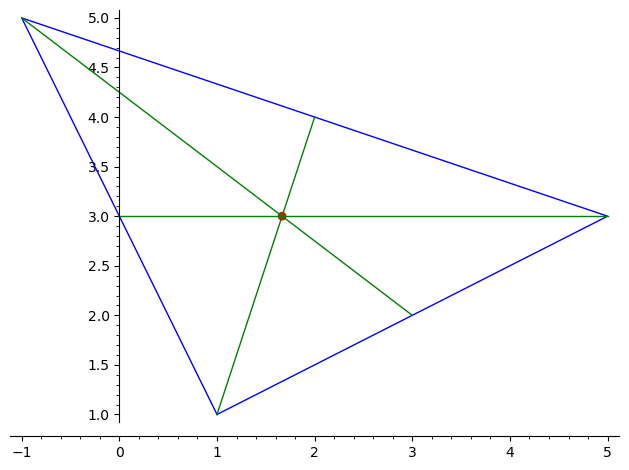

In [333]:
g+=point(S,color='red',pointsize=40)
g

<h1>n-Eck</h1> 

Wir wollen ein regelmäßiges n-Eck zeichnen.

In [335]:
def ngon(n):
    return [[cos(2*pi*k/n),sin(2*pi*k/n)] for k in [0..n]]

In [336]:
ngon(12)

[[1, 0],
 [1/2*sqrt(3), 1/2],
 [1/2, 1/2*sqrt(3)],
 [0, 1],
 [-1/2, 1/2*sqrt(3)],
 [-1/2*sqrt(3), 1/2],
 [-1, 0],
 [-1/2*sqrt(3), -1/2],
 [-1/2, -1/2*sqrt(3)],
 [0, -1],
 [1/2, -1/2*sqrt(3)],
 [1/2*sqrt(3), -1/2],
 [1, 0]]

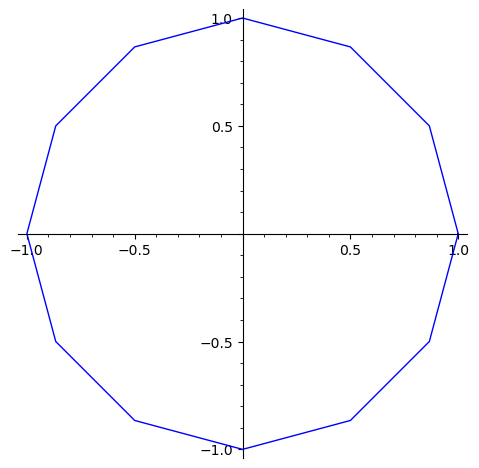

In [337]:
g=line(ngon(12),aspect_ratio=1)
g

Füge farbige Linien vom Ursprung zu den Eckpunkten hinzu:

In [338]:
pkte=ngon(12)
for k in range(12):
    g+=line([[0,0],pkte[k]],color=hue(k/12))

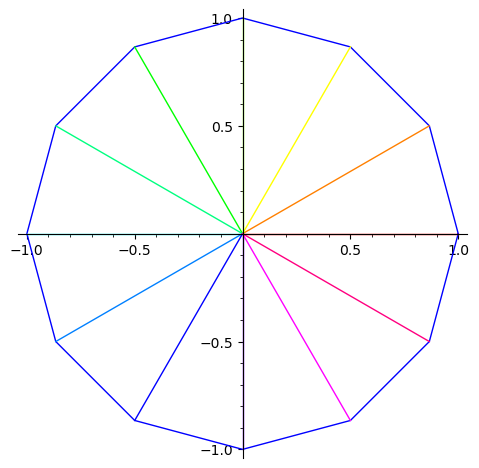

In [339]:
g

Die hier verwendete Funktion hue(h) parameterisiert alle Farbtöne durch Zahlen h von 0 bis 1. 

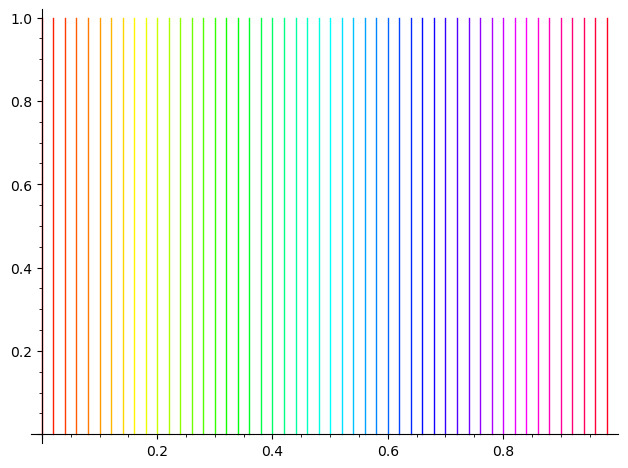

In [340]:
n=50
col=Graphics()

for k in range(n):
    col += line([[k/n,0],[k/n,1]],color=hue(k/n))
col

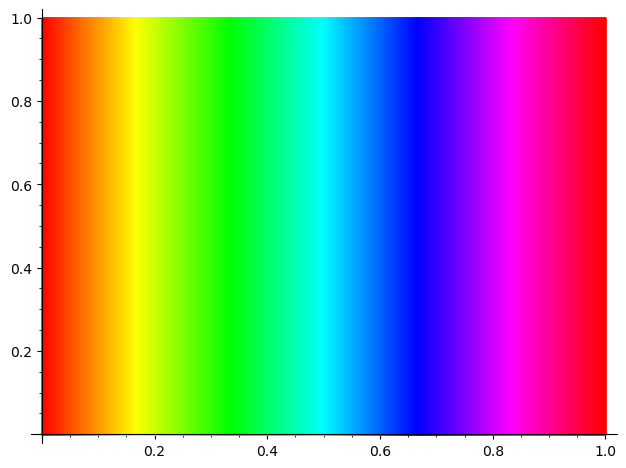

In [341]:
n=5000
col=Graphics()

for k in range(n):
    col += line([[k/n,0],[k/n,1]],color=hue(k/n))
col

hue(): kann noch zwei weitere Argumente übernehmen, beide zwischen 0 und 1 und mit Standardwert 1: Sättigung und Helligkeit der Farbe.

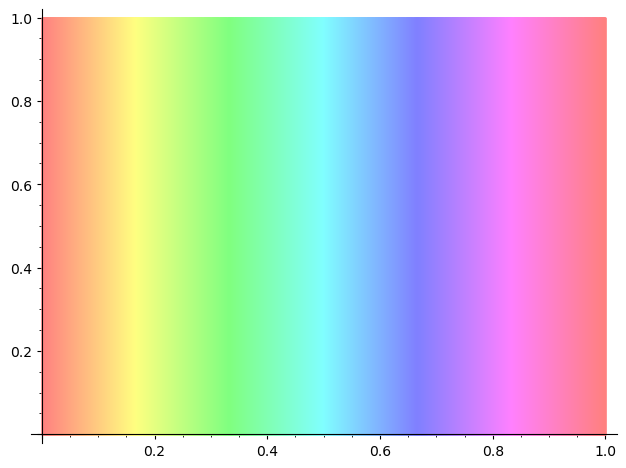

In [344]:
n=5000
col=Graphics()

for k in range(n):
    col += line([[k/n,0],[k/n,1]],color=hue(k/n,0.5,1))
col

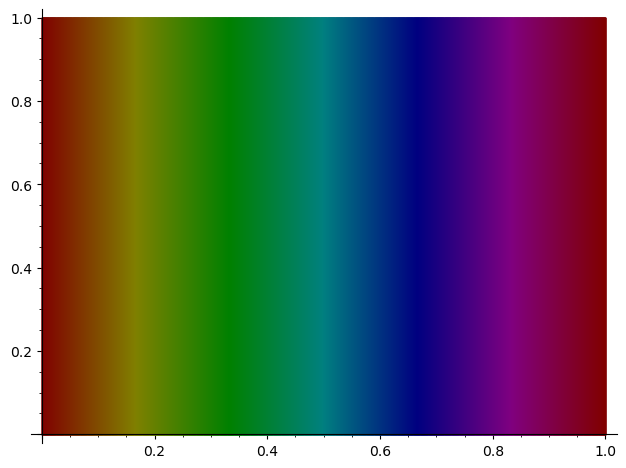

In [345]:
n=5000
col=Graphics()

for k in range(n):
    col += line([[k/n,0],[k/n,1]],color=hue(k/n,1,0.5))
col

<h1>Lineare Algebra</h1>

Matrizen

In [346]:
A=matrix([[1,2,3],[4,5,6]])
A

[1 2 3]
[4 5 6]

In [347]:
show(A)

[1 2 3]
[4 5 6]

In [348]:
parent(A)

Full MatrixSpace of 2 by 3 dense matrices over Integer Ring

In [349]:
A[1,1]

5

Achtung: Indizes starten bei 0! 

In [350]:
B=matrix(3,2,[1,2,3,4,5,6])
B

[1 2]
[3 4]
[5 6]

In [351]:
A*B

[22 28]
[49 64]

In [352]:
B*A

[ 9 12 15]
[19 26 33]
[29 40 51]

Man kann auch eine Funktion angeben, mittels der die Einträge aus ihren Zeilen- und Spaltenindizes berechnet werden.

Hier: die (10 x 10)-Hilbertmatrix

In [353]:
n=10
H=matrix(n,n,lambda i,j: 1/(i+j+1))
H

[   1  1/2  1/3  1/4  1/5  1/6  1/7  1/8  1/9 1/10]
[ 1/2  1/3  1/4  1/5  1/6  1/7  1/8  1/9 1/10 1/11]
[ 1/3  1/4  1/5  1/6  1/7  1/8  1/9 1/10 1/11 1/12]
[ 1/4  1/5  1/6  1/7  1/8  1/9 1/10 1/11 1/12 1/13]
[ 1/5  1/6  1/7  1/8  1/9 1/10 1/11 1/12 1/13 1/14]
[ 1/6  1/7  1/8  1/9 1/10 1/11 1/12 1/13 1/14 1/15]
[ 1/7  1/8  1/9 1/10 1/11 1/12 1/13 1/14 1/15 1/16]
[ 1/8  1/9 1/10 1/11 1/12 1/13 1/14 1/15 1/16 1/17]
[ 1/9 1/10 1/11 1/12 1/13 1/14 1/15 1/16 1/17 1/18]
[1/10 1/11 1/12 1/13 1/14 1/15 1/16 1/17 1/18 1/19]

Dasselbe mittels Listen: die innere list comprehension erzeugt die (i+1)-te Zeile, die äußere somit eine Liste aller Zeilen der Matrix.

In [354]:
H=matrix([[1/(i+j+1) for j in range(n)] for i in range(n)])
H

[   1  1/2  1/3  1/4  1/5  1/6  1/7  1/8  1/9 1/10]
[ 1/2  1/3  1/4  1/5  1/6  1/7  1/8  1/9 1/10 1/11]
[ 1/3  1/4  1/5  1/6  1/7  1/8  1/9 1/10 1/11 1/12]
[ 1/4  1/5  1/6  1/7  1/8  1/9 1/10 1/11 1/12 1/13]
[ 1/5  1/6  1/7  1/8  1/9 1/10 1/11 1/12 1/13 1/14]
[ 1/6  1/7  1/8  1/9 1/10 1/11 1/12 1/13 1/14 1/15]
[ 1/7  1/8  1/9 1/10 1/11 1/12 1/13 1/14 1/15 1/16]
[ 1/8  1/9 1/10 1/11 1/12 1/13 1/14 1/15 1/16 1/17]
[ 1/9 1/10 1/11 1/12 1/13 1/14 1/15 1/16 1/17 1/18]
[1/10 1/11 1/12 1/13 1/14 1/15 1/16 1/17 1/18 1/19]

Matrizen können auch symbolische Ausdrüdke enthalten. In diesem Fall wird die Matrix als Matrix über dem Symbolic Ring betrachtet. (Alle Einträge einer Matrix müssen aus demselben Ring sein.)

In [355]:
A=matrix([[1,x],[0,1]])
A

[1 x]
[0 1]

In [356]:
parent(A)

Full MatrixSpace of 2 by 2 dense matrices over Symbolic Ring

In [357]:
H

[   1  1/2  1/3  1/4  1/5  1/6  1/7  1/8  1/9 1/10]
[ 1/2  1/3  1/4  1/5  1/6  1/7  1/8  1/9 1/10 1/11]
[ 1/3  1/4  1/5  1/6  1/7  1/8  1/9 1/10 1/11 1/12]
[ 1/4  1/5  1/6  1/7  1/8  1/9 1/10 1/11 1/12 1/13]
[ 1/5  1/6  1/7  1/8  1/9 1/10 1/11 1/12 1/13 1/14]
[ 1/6  1/7  1/8  1/9 1/10 1/11 1/12 1/13 1/14 1/15]
[ 1/7  1/8  1/9 1/10 1/11 1/12 1/13 1/14 1/15 1/16]
[ 1/8  1/9 1/10 1/11 1/12 1/13 1/14 1/15 1/16 1/17]
[ 1/9 1/10 1/11 1/12 1/13 1/14 1/15 1/16 1/17 1/18]
[1/10 1/11 1/12 1/13 1/14 1/15 1/16 1/17 1/18 1/19]

In [358]:
parent(H)

Full MatrixSpace of 10 by 10 dense matrices over Rational Field

In [359]:
A

[1 x]
[0 1]

In [360]:
A*A

[  1 2*x]
[  0   1]

In [361]:
A^5

[  1 5*x]
[  0   1]

Auch gewisse symbolische Rechnungen mit Matrizen sind möglich.

In [362]:
var('k')

k

In [363]:
A^k

[  1 k*x]
[  0   1]

In [364]:
identity_matrix(5)

[1 0 0 0 0]
[0 1 0 0 0]
[0 0 1 0 0]
[0 0 0 1 0]
[0 0 0 0 1]

In [365]:
zero_matrix(2,5)

[0 0 0 0 0]
[0 0 0 0 0]

In [366]:
A.parent()

Full MatrixSpace of 2 by 2 dense matrices over Symbolic Ring

<h2>Dünnbesetzte Matrizen</h2>

Matrizen, bei denen die meisten Einträge gleich 0 sind. Hier ist es effizienter, nicht alle Einträge zu speichern, sondern nur die Einträge ungleich 0 anzugeben. Dies erfolgt mittels Dictionary.

In [367]:
B=matrix(20,20,{(0,0):1, (3,4):2})
B

20 x 20 sparse matrix over Integer Ring (use the '.str()' method to see the entries)

In [368]:
show(B)

20 x 20 sparse matrix over Integer Ring (use the '.str()' method to see the entries)

In [369]:
B.str()

'[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]\n[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]\n[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]\n[0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]\n[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]\n[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]\n[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]\n[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]\n[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]\n[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]\n[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]\n[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]\n[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]\n[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]\n[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]\n[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]\n[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]\n[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]\n[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]\n[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]'

In [370]:
A

[1 x]
[0 1]

A[i] liefert die (i+1)-te Zeile der Matrix (als Vektor).

In [371]:
A[0]

(1, x)

Das funktioniert auch mit dünnbesetzten Matrizen.

In [375]:
B[0]

(1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

In [376]:
A.row(0)

(1, x)

In [377]:
A.column(1)   # zweite Spalte

(x, 1)

In [378]:
A

[1 x]
[0 1]

Einträge einer Matrix können direkt überschrieben werden.

In [379]:
var('y')

y

In [380]:
A[1,1]=y

In [381]:
A

[1 x]
[0 y]

In [382]:
A[0,0]=0.5

In [383]:
A

[0.500000000000000                 x]
[                0                 y]

In [384]:
parent(A[0,0])

Symbolic Ring

In [385]:
B

20 x 20 sparse matrix over Integer Ring (use the '.str()' method to see the entries)

Die neuen Einträge müssen allerdings im der Matrix zugrundeliegenden Ring liegen. Hier: die ganzen Zahlen

In [386]:
B[1,1]=x

TypeError: unable to convert x to an integer

In [387]:
C=matrix(2,2,[1,2,3,4])
C

[1 2]
[3 4]

In [388]:
C[0,0]=x

TypeError: unable to convert x to an integer

Matlab-Notation für Zeilen und Spalten funktioniert auch. Achtung: hier werden Matrizen zurückgegeben, keine Vektoren.

In [389]:
A[:,1] 

[x]
[y]

In [390]:
A

[0.500000000000000                 x]
[                0                 y]

In [391]:
parent(A[:,1])

Full MatrixSpace of 2 by 1 dense matrices over Symbolic Ring

In [392]:
parent(A.column(1))

Vector space of dimension 2 over Symbolic Ring

In [393]:
A[0,0]

0.500000000000000

In [394]:
parent(_)

Symbolic Ring

<h1>Lineare Gleichungssysteme</h1>

In [395]:
H

[   1  1/2  1/3  1/4  1/5  1/6  1/7  1/8  1/9 1/10]
[ 1/2  1/3  1/4  1/5  1/6  1/7  1/8  1/9 1/10 1/11]
[ 1/3  1/4  1/5  1/6  1/7  1/8  1/9 1/10 1/11 1/12]
[ 1/4  1/5  1/6  1/7  1/8  1/9 1/10 1/11 1/12 1/13]
[ 1/5  1/6  1/7  1/8  1/9 1/10 1/11 1/12 1/13 1/14]
[ 1/6  1/7  1/8  1/9 1/10 1/11 1/12 1/13 1/14 1/15]
[ 1/7  1/8  1/9 1/10 1/11 1/12 1/13 1/14 1/15 1/16]
[ 1/8  1/9 1/10 1/11 1/12 1/13 1/14 1/15 1/16 1/17]
[ 1/9 1/10 1/11 1/12 1/13 1/14 1/15 1/16 1/17 1/18]
[1/10 1/11 1/12 1/13 1/14 1/15 1/16 1/17 1/18 1/19]

In [396]:
b=matrix(n,1,lambda i,j: 1/(i+1)^2)
b

[    1]
[  1/4]
[  1/9]
[ 1/16]
[ 1/25]
[ 1/36]
[ 1/49]
[ 1/64]
[ 1/81]
[1/100]

Verschiedene Möglichkeiten, das lineare Gleichungssystem H x = b zu lösen.

In [397]:
H^-1*b  # inverse Matrix

[ 1451/252]
[      -99]
[     1188]
[    -8008]
[  63063/2]
[-378378/5]
[   112112]
[-700128/7]
[ 196911/4]
[ -92378/9]

In [398]:
show(H^-1)

[           100          -4950          79200        -600600        2522520       -6306300        9609600       -8751600        4375800        -923780]
[         -4950         326700       -5880600       47567520     -208107900      535134600     -832431600      770140800     -389883780       83140200]
[         79200       -5880600      112907520     -951350400     4281076800   -11237826600    17758540800   -16635041280     8506555200    -1829084400]
[       -600600       47567520     -951350400     8245036800   -37875637800   101001700800  -161602721280   152907955200   -78843164400    17071454400]
[       2522520     -208107900     4281076800   -37875637800   176752976400  -477233036280   771285715200  -735869534400   382086104400   -83223340200]
[      -6306300      535134600   -11237826600   101001700800  -477233036280  1301544644400 -2121035716800  2037792556800 -1064382719400   233025352560]
[       9609600     -832431600    17758540800  -161602721280   771285715200 -2121035716800  3480673996800 -3363975014400  1766086882560  -388375587600]
[      -8751600      770140800   -16635041280   152907955200  -735869534400  2037792556800 -3363975014400  3267861442560 -1723286307600   380449555200]
[       4375800     -389883780     8506555200   -78843164400   382086104400 -1064382719400  1766086882560 -1723286307600   912328045200  -202113826200]
[       -923780       83140200    -1829084400    17071454400   -83223340200   233025352560  -388375587600   380449555200  -202113826200    44914183600]

In [399]:
H\b   # veraltete Notation

/tmp/ipykernel_1199035/1177984626.py:1: DeprecationWarning: the backslash operator has been deprecated
See https://github.com/sagemath/sage/issues/36394 for details.
  H * BackslashOperator() * b   # veraltete Notation
/tmp/ipykernel_1199035/1177984626.py:1: DeprecationWarning: the backslash operator has been deprecated; use A.solve_right(B) instead
See https://github.com/sagemath/sage/issues/36394 for details.
  H * BackslashOperator() * b   # veraltete Notation


[ 1451/252]
[      -99]
[     1188]
[    -8008]
[  63063/2]
[-378378/5]
[   112112]
[-700128/7]
[ 196911/4]
[ -92378/9]

In [400]:
H.solve_right(b)  # aktuelle Notation

[ 1451/252]
[      -99]
[     1188]
[    -8008]
[  63063/2]
[-378378/5]
[   112112]
[-700128/7]
[ 196911/4]
[ -92378/9]

Funktioniert auch, wenn die rechte Seite ein Vektor ist.

In [401]:
b=vector([1/i^2 for i in [1..10]])
b

(1, 1/4, 1/9, 1/16, 1/25, 1/36, 1/49, 1/64, 1/81, 1/100)

In [402]:
H.solve_right(b)

(1451/252, -99, 1188, -8008, 63063/2, -378378/5, 112112, -700128/7, 196911/4, -92378/9)

Statt H x = b kann man auch das Gleichungssystem x H = b lösen, bei dem x und b als Zeilenvektoren betrachtet werden.

In unserem Fall gibt das dasselbe Ergebnis (da H symmetrisch ist), im Allgemeinen nicht.

In [403]:
H.solve_left(b)

(1451/252, -99, 1188, -8008, 63063/2, -378378/5, 112112, -700128/7, 196911/4, -92378/9)

Nicht jede Matrix hat eine Inverse (das wird bald in der linearen Algebra behandelt werden).

In [404]:
A=matrix([[1,2,3],[2,4,5],[0,0,1]])
A

[1 2 3]
[2 4 5]
[0 0 1]

In [405]:
A^-1

ZeroDivisionError: matrix must be nonsingular

Der Kern der Matrix A    (also der linearen Abbildung x -> Ax)

In [406]:
A.right_kernel()

Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 2 -1  0]

In [407]:
D=matrix(QQ,2,2,[1,2,3,4])
D

[1 2]
[3 4]

In [408]:
parent(D)

Full MatrixSpace of 2 by 2 dense matrices over Rational Field

In [409]:
D.right_kernel()

Vector space of degree 2 and dimension 0 over Rational Field
Basis matrix:
[]

Der Kern ist ein Vektorraum (hier genauer: ein Modul, da über ZZ). 

<h2>Vektorräume</h2>

In [410]:
V=QQ^5

In [411]:
V

Vector space of dimension 5 over Rational Field

In [412]:
v1=V([1,1,1,0,0])
v2=V([1,-1,1,0,0])
v3=V([1,0,1,0,0])

In [413]:
v1,v2,v3

((1, 1, 1, 0, 0), (1, -1, 1, 0, 0), (1, 0, 1, 0, 0))

In [414]:
parent(v1)

Vector space of dimension 5 over Rational Field

Der von den Vektoren v1,v2,v3 erzeugte Untervektorraum.

In [415]:
U=V.subspace([v1,v2,v3])
U

Vector space of degree 5 and dimension 2 over Rational Field
Basis matrix:
[1 0 1 0 0]
[0 1 0 0 0]

Die <b>Zeilen</b> der hier ausgegebenen Matrix sind die Vektoren der intern für U verwendeten Basis. Man kann die Basis auch wie folgt bekommen:

In [416]:
U.basis()

[(1, 0, 1, 0, 0), (0, 1, 0, 0, 0)]

In [417]:
v4=V([0,0,0,0,1])
v4

(0, 0, 0, 0, 1)

In [418]:
v4 in U

False

In [419]:
v1 in U

True

Die Koordinaten von v1 bezüglich der intern verwendeten Basis von U:

In [420]:
U.coordinates(v1)

[1, 1]

In [421]:
parent(_)

<class 'list'>

In [422]:
vector(U.coordinates(v1))*matrix(U.basis())==v1

True

In [423]:
matrix(U.basis())

[1 0 1 0 0]
[0 1 0 0 0]

In [424]:
W=V.subspace([v4])
W

Vector space of degree 5 and dimension 1 over Rational Field
Basis matrix:
[0 0 0 0 1]

In [425]:
W.is_subspace(U)

False

In [426]:
W.is_subspace(V)

True

Die Summe der beiden Untervektorräume (= der kleinste Unterviktorraum, der U und W enthält)

In [427]:
U+W

Vector space of degree 5 and dimension 3 over Rational Field
Basis matrix:
[1 0 1 0 0]
[0 1 0 0 0]
[0 0 0 0 1]

In [428]:
U.is_subspace(U+W)

True

Der Durchschnitt der beiden Untervektorräume 

In [429]:
U.intersection(W)

Vector space of degree 5 and dimension 0 over Rational Field
Basis matrix:
[]

In [430]:
A.right_kernel()

Free module of degree 3 and rank 1 over Integer Ring
Echelon basis matrix:
[ 2 -1  0]

Wir wandeln A in eine Matrix über QQ um, damit ihr Kern ein Untervektorraum von QQ^3 wird.

In [431]:
A1=matrix(QQ,A)
A1

[1 2 3]
[2 4 5]
[0 0 1]

In [432]:
parent(A1)

Full MatrixSpace of 3 by 3 dense matrices over Rational Field

In [433]:
A1.right_kernel()

Vector space of degree 3 and dimension 1 over Rational Field
Basis matrix:
[   1 -1/2    0]

Achtung: A1.image() liefert das Bild der linearen Abbildung x -> xA, nicht das der von uns üblicherweise verwendeten linearen Abbildung x -> Ax. 

(in anderen Worten: A1.image() liefert den von den Zeilen von A aufgespannten Untervektorraum.)

In [434]:
A1.image()    # falsches Bild!

Vector space of degree 3 and dimension 2 over Rational Field
Basis matrix:
[1 2 0]
[0 0 1]

In [435]:
A1.row_space()

Vector space of degree 3 and dimension 2 over Rational Field
Basis matrix:
[1 2 0]
[0 0 1]

Leider gibt es keine Methode .right_image(). Wir können das Bild von A (in unserem Sinne) z.B. über den Spaltenraum erhalten.

In [436]:
A1.column_space()   # Das ist der richtige Bildraum für uns!

Vector space of degree 3 and dimension 2 over Rational Field
Basis matrix:
[ 1  0  2]
[ 0  1 -1]